# Bike Sharing Assignment - Linear Regression

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Objective
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Approach

We will use Linear Regression model to identify the variables responsible for demand of shared bikes.
1.	Data Understanding
2.	Visualizing the Data
3.	Data Preparation
4.	Splitting the Data into Training and Testing Sets
5.	Building a linear model
6.	Linear Regression Assumptions Validation
7.	Making Predictions Using the Final Model
8.	Model Evaluation
9.	Conclusion

## 1. Data Understanding

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes=pd.read_csv("day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking for null values and data types
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.shape

(730, 16)

## 2. Visualising the Data

In [7]:
#dropping the unnecessary varaible.
bikes=bikes.drop(['dteday','instant','casual','registered'],axis=1)

In [8]:
# creating the list of numerical varaible to visualising
varlist=bikes[['temp','atemp','hum','windspeed','cnt']]

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1800x1080 with 0 Axes>

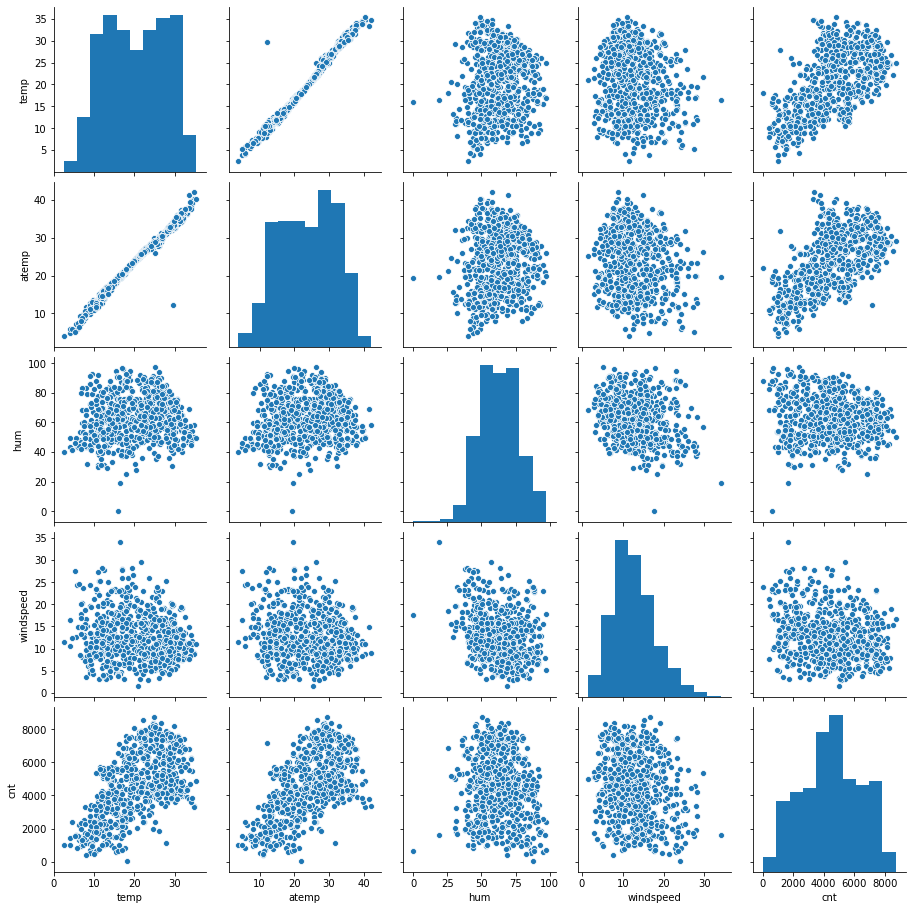

In [9]:
plt.figure(figsize=(25, 15))
sns.pairplot(varlist)
plt.show()

temp and atemp are highly correlated and cnt is highly dependent upon temp.

#### Visualising Categorical Variables

there are a few categorical variables as well. Let's make a boxplot for some of these variables.

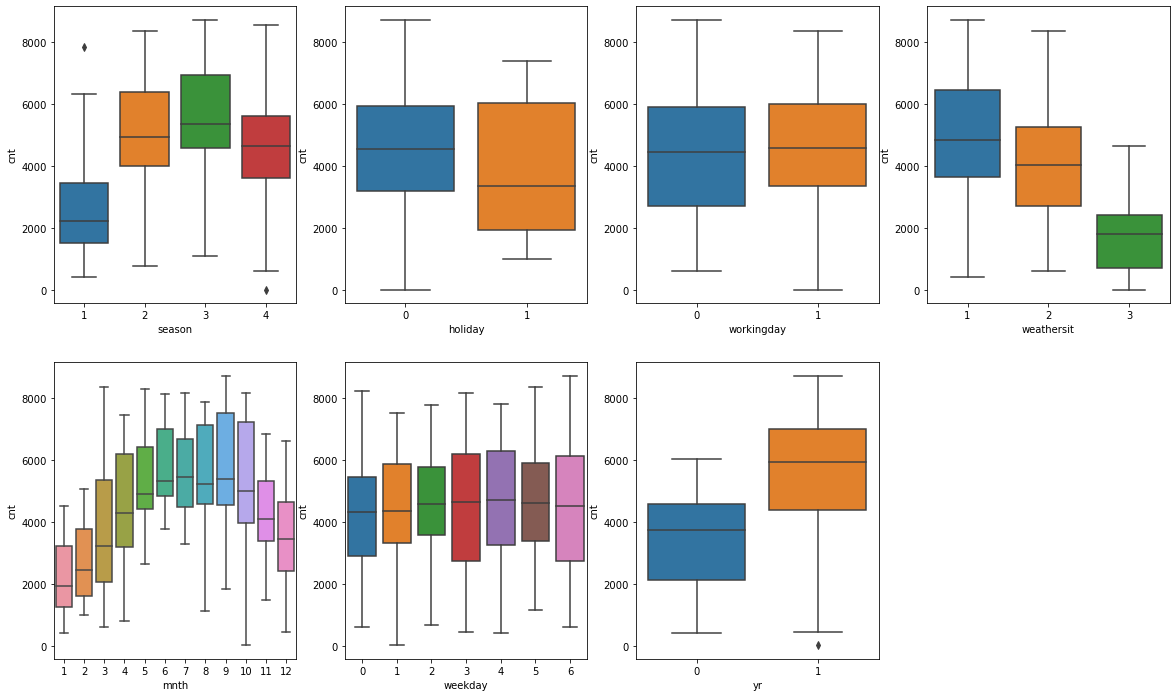

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.show()

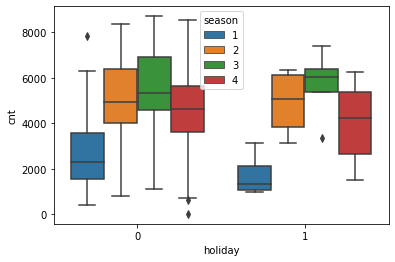

In [11]:
# Visualizing impact on cnt from holiday and season
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes,hue='season')
plt.show()

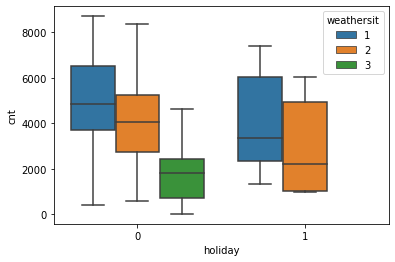

In [12]:
# Visualizing impact on cnt from holiday and weather
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes,hue='weathersit')
plt.show()

## 3. Data Preparation

We have `season`, `mnth`, `weekday`, `weathersit` as categorical column, but they are represented in numbers, it can be little challening to interpret them after the analysis. Let's map their original values for better understanding.

From data dictionary:
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit :
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
# converting the season numerical values to season categorical values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
# converting the weathersit numerical values to weathersit categorical values
bikes['weathersit'] = bikes['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'LightSnow', 4:'HeavyRain'})

In [15]:
# converting the months numerical values to month categorical values

bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [16]:
# converting the weekdays numerical values to weekdays categorical values
bikes['weekday'] = bikes['weekday'].map({0:'Tue', 1:'Wed', 2:'Thur', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'})

In [17]:
# checking dataset again
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

we have season,mnth,weekday and weathersit as a categorical varaible.

For this, we will creating the `dummy variables`.

In [18]:
# creating dummy variables for categorical variables
season = pd.get_dummies(bikes['season'], drop_first = True)
bikes = pd.concat([bikes, season], axis = 1)
bikes.drop(['season'], axis = 1, inplace = True)

mnth = pd.get_dummies(bikes['mnth'], drop_first = True)
bikes = pd.concat([bikes, mnth], axis = 1)
bikes.drop(['mnth'], axis = 1, inplace = True)

weekday = pd.get_dummies(bikes['weekday'], drop_first = True)
bikes = pd.concat([bikes, weekday], axis = 1)
bikes.drop(['weekday'], axis = 1, inplace = True)

weathersit = pd.get_dummies(bikes['weathersit'], drop_first = True)
bikes = pd.concat([bikes, weathersit], axis = 1)
bikes.drop(['weathersit'], axis = 1, inplace = True)

bikes.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,LightSnow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Splitting the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [20]:
df_train.shape

(510, 30)

In [21]:
df_test.shape

(220, 30)

### Rescaling the Features 

we will use MinMax scaling, so that variables have same magnitude and model converge faster.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
num_vars=['atemp','temp','windspeed','cnt','hum']

In [24]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,LightSnow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,1,0


In [26]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,LightSnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


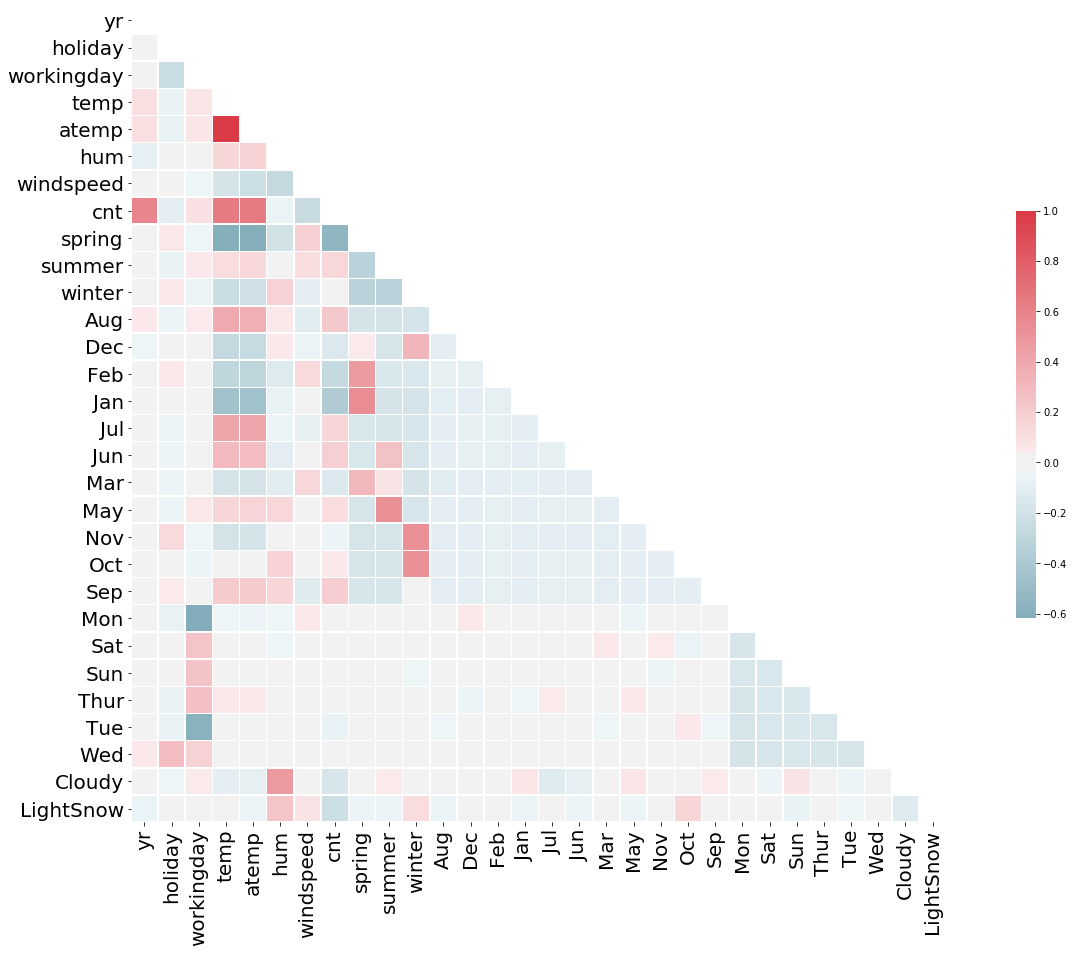

In [27]:
#Creating heatmap to visualize the correlation 

#To find correlation among varibales
corr = df_train.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
ax.tick_params(labelsize=20)

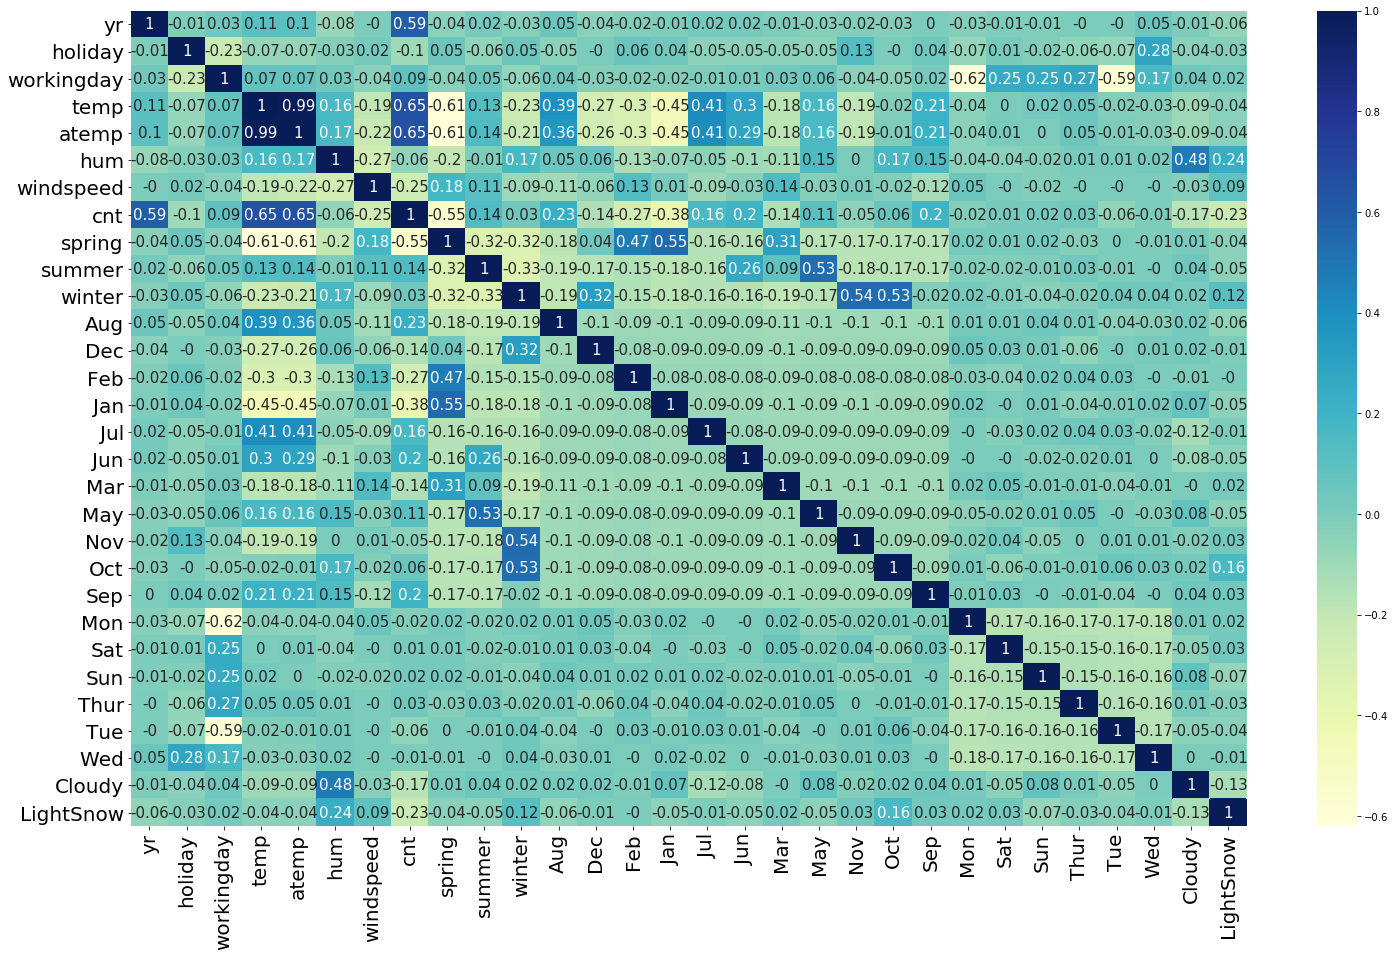

In [28]:
# Creating heatmap to visualize the correlation
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='YlGnBu', annot_kws={"size": 15})
ax.tick_params(labelsize=20)
plt.show()

In [29]:
# Dropping the highly corrlated varavble
df_train=df_train.drop(['atemp'],axis=1)

### Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

## 5. Building a linear model

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 10),
 ('Thur', False, 9),
 ('Tue', False, 7),
 ('Wed', False, 8),
 ('Cloudy', True, 1),
 ('LightSnow', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Mon', 'Cloudy', 'LightSnow'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Sun',
       'Thur', 'Tue', 'Wed'],
      dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [37]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_sm1 = sm.add_constant(X_train_rfe)

In [38]:
lm1 = sm.OLS(y_train,X_train_sm1).fit()   # Running the linear model

In [39]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.22e-191
Time:                        17:33:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [40]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
13,Cloudy,2.29
0,yr,2.09
12,Mon,1.98


##### Observation 
- All variables p-value less than 0.05, indicates that relationship is significant.
- VIF values of hum is more than 10, indicates that multicollinearity so decided to drop.


### Model 2

#### Rebuilding the model again.

In [41]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train,X_train_sm2).fit() 
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.60e-188
Time:                        17:33:58   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [42]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,Mon,1.97
8,Jan,1.62
9,Jul,1.59


##### Observation 
- All variables p-value less than 0.05, indicates that relationship is significant.
- VIF values of temp is more than 10, indicates that multicollinearity so decided to drop.However, after dropping the temp the model R2 and Adj R2 dropped significantly.so keeping this variable as this must be important variable to predict the target variable. 
- So dropping the next varaible which has the high VIF

### Model 3

#### Rebuilding the model again.

In [43]:
X_train_rfe3 = X_train_rfe2.drop(["workingday"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_sm3).fit() 
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.48e-186
Time:                        17:33:59   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2120      0.030      6.978      0.0

##### Observation 
- p-value of Monday is more than 0.05, indicates that relationship is insignificant.so decided to drop.

### Model 4

#### Rebuilding the model again.

In [44]:
X_train_rfe4 = X_train_rfe3.drop(["Mon"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm4 = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train,X_train_sm4).fit() 
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          8.14e-187
Time:                        17:33:59   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [45]:
# Calculate the VIFs for the final model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,Jul,1.59
10,Cloudy,1.56
9,Sep,1.34


##### Observation 
- All variables p-value less than 0.05, indicates that relationship is significant.
- VIF values of all varaible is less than 5. Except the temp, and we already knew that this is important variable.  
- Therefore, this is our Final Model with R-squared 83%. 

In [46]:
X_train_new=X_train_sm4
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sep', 'Cloudy', 'LightSnow'],
      dtype='object')

In [47]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [48]:
X_train_new.shape

(510, 12)

## 6. Linear Regression Assumptions Validation

##### 1. Error terms are normally distributed (not X, Y) 

In [49]:
y_train_pred = lm4.predict(X_train_sm4)
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

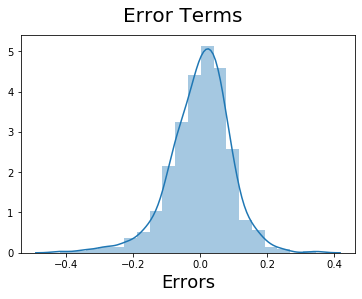

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### Observation 
- Error Terms are normally distributed. 

#### 2.	Error terms have constant variance (homoscedasticity) and independent of each other.

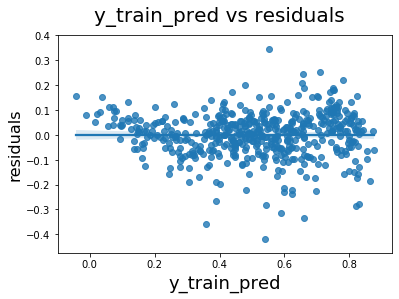

In [51]:
# plotting residuals and y_train_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_train_pred,res)   
fig.suptitle('y_train_pred vs residuals', fontsize = 20)  
plt.xlabel('y_train_pred', fontsize = 18)                          
plt.ylabel('residuals', fontsize = 16)    
plt.show()

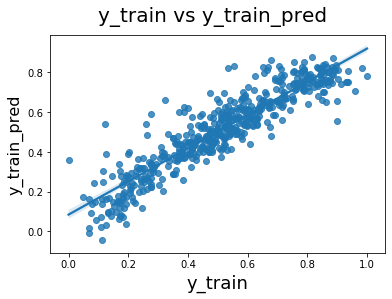

In [52]:
# plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_train,y_train_pred)  
fig.suptitle('y_train vs y_train_pred', fontsize = 20)  
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

##### Observation 
- Error Terms do not show any pattern.
- Variance is constant.

## 7. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [53]:
num_vars=['atemp','temp','windspeed','cnt','hum']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,LightSnow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [55]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [57]:
X_test.head(2)

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,LightSnow
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Creating X_test dataframe by dropping variables from X_test

X_test=X_test[['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer','winter', 'Jan', 'Jul', 'Sep', 'Cloudy', 'LightSnow']]

X_test

,const,yr,holiday,temp,windspeed,spring,summer,winter,Jan,Jul,Sep,Cloudy,LightSnow
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,0,1,0,0,0,0,0
127,1.0,0,0,0.584649,0.069510,0,1,0,0,0,0,0,0
640,1.0,1,0,0.745598,0.052115,0,0,1,0,0,0,1,0
72,1.0,0,0,0.331557,0.203418,1,0,0,0,0,0,0,0


In [59]:
X_test.shape

(220, 13)

In [60]:
X_test.head(5)

,const,yr,holiday,temp,windspeed,spring,summer,winter,Jan,Jul,Sep,Cloudy,LightSnow
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [61]:
# Making predictions using the final model

y_pred = lm4.predict(X_test)

 ## 8. Model Evaluation

Text(0, 0.5, 'y_pred')

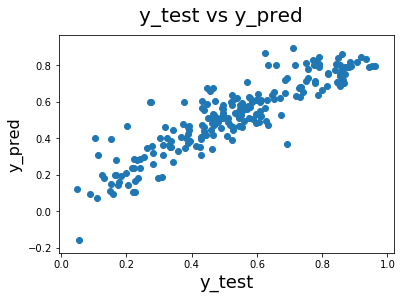

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

#### Calculating Different Scores

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [64]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.07290196757439751
0.009440045304207327


#### Calculating r2 Scores

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8025684920603358

 ## 9. Conclusion

- Temperature (temp), year(yr) and weather(weathersit) LightSnow category features has the high impact on bikes rental count.
- When the weather is clear we are seeing lot of bike rentals.
- Bike rentals increases as the temperature increases.
- Bike rentals increases with the year.
- R-sqaured and Adjusted R-squared (extent of fit) - 0.83 and 0.83 - 83% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 3212.3 and 8.14e-187(approx. 0.0) - Model fit is significant and explained 83% variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.